In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
benin = pd.read_csv('data/benin_melanville_clean.csv')
sierra = pd.read_csv('data/sierra_leone_bumbuna_clean.csv')
togo = pd.read_csv('data/togo_dapaong_clean.csv')

In [26]:
benin['country'] = 'Benin'
sierra['country'] = 'Sierra Leone'
togo['country'] = 'Togo'
df = pd.concat([benin, sierra, togo])


<Axes: xlabel='country', ylabel='GHI'>

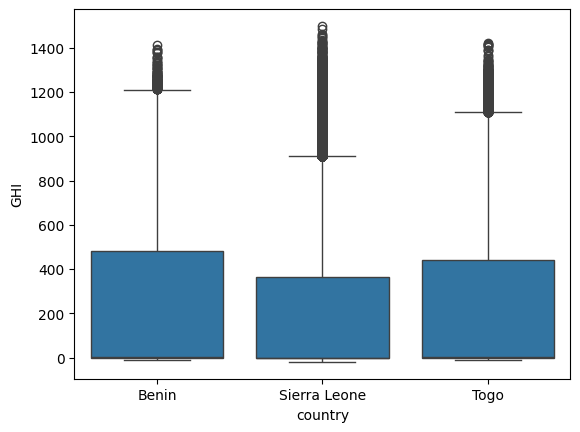

In [10]:
sns.boxplot(data=df, x='country', y='GHI')


In [13]:
df.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])



GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [14]:
from scipy.stats import f_oneway
f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])


F_onewayResult(statistic=np.float64(2090.092870479632), pvalue=np.float64(0.0))

In [22]:
print("GHI Ranges:")
print("Benin:", benin['GHI'].min(), "-", benin['GHI'].max())
print("Sierra Leone:", sierra['GHI'].min(), "-", sierra['GHI'].max())
print("Togo:", togo['GHI'].min(), "-", togo['GHI'].max())

GHI Ranges:
Benin: -12.9 - 1413.0
Sierra Leone: -19.5 - 1499.0
Togo: -12.7 - 1424.0


In [39]:
benin_mean = benin['GHI'].mean()
sierra_mean = sierra['GHI'].mean()
togo_mean = togo['GHI'].mean()

# Print mean values
print("Benin mean GHI:", benin_mean*24/1000)
print("Sierra Leone mean GHI:", sierra_mean*24/1000)
print("Togo mean GHI:", togo_mean*24/1000)

means = {
    "Benin": benin_mean,
    "Sierra Leone": sierra_mean,
    "Togo": togo_mean
}

max_country = max(means, key=means.get)
max_value = means[max_country]

# Print investment recommendation
print(f"\nBased on the GHI analysis, it is recommended to investing in {max_country} with the highest solar potential ({(max_value*24/1000):.2f} kWh/m²/day).")

Benin mean GHI: 5.773426858447489
Sierra Leone mean GHI: 4.846980365296804
Togo mean GHI: 5.5333209543379

Based on the GHI analysis, it is recommended to investing in Benin with the highest solar potential (5.77 kWh/m²/day).


In [37]:
print("Standard deviations:")
print("Benin:", (benin['GHI']*24/10000).std())
print("Sierra Leone:", (sierra['GHI']*24/10000).std())
print("Togo:", (togo['GHI']*24/10000).std())

Standard deviations:
Benin: 0.7947151854604718
Sierra Leone: 0.7163883610295653
Togo: 0.7740776318676703


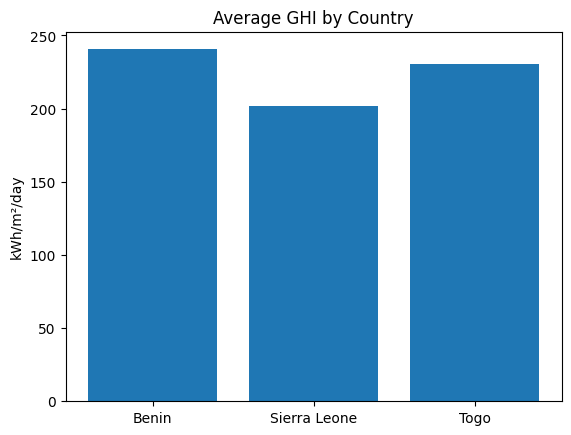

In [34]:
plt.bar(['Benin', 'Sierra Leone', 'Togo'], 
        [benin['GHI'].mean(), sierra['GHI'].mean(), togo['GHI'].mean()])
plt.title("Average GHI by Country")
plt.ylabel("kWh/m²/day")
plt.show()